In [2]:
# need to install pandas and matplotlib first

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv("z.csv")
print(df.head(10))

                  Date      Chat Name  Creator        Exchanges      Symbol  \
0  2021-03-01 13:36:53  #Zulu staging      NaN  Binance Futures   EGLD/USDT   
1  2021-03-01 13:18:31  #Zulu staging      NaN  Binance Futures   ALGO/USDT   
2  2021-03-01 13:16:14  #Zulu staging      NaN  Binance Futures  THETA/USDT   
3  2021-03-01 13:15:15  #Zulu staging      NaN  Binance Futures  WAVES/USDT   
4  2021-03-01 13:03:54  #Zulu staging      NaN  Binance Futures   ATOM/USDT   
5  2021-03-01 13:03:07  #Zulu staging      NaN  Binance Futures    BLZ/USDT   
6  2021-03-01 13:02:53  #Zulu staging      NaN  Binance Futures   LINK/USDT   
7  2021-03-01 13:00:40  #Zulu staging      NaN  Binance Futures    ONT/USDT   
8  2021-03-01 12:55:13  #Zulu staging      NaN  Binance Futures    TRX/USDT   
9  2021-03-01 12:54:30  #Zulu staging      NaN  Binance Futures    XLM/USDT   

                     Status      Leverage Direction  Last Target  \
0      All Targets Achieved  Cross (5.0X)     Short           

In [5]:
"""Data Cleaning: Remove Creator, DO NOT REMOVE Cancelled"""
refined_df = df.drop(columns="Creator")
print(refined_df.head())

                  Date      Chat Name        Exchanges      Symbol  \
0  2021-03-01 13:36:53  #Zulu staging  Binance Futures   EGLD/USDT   
1  2021-03-01 13:18:31  #Zulu staging  Binance Futures   ALGO/USDT   
2  2021-03-01 13:16:14  #Zulu staging  Binance Futures  THETA/USDT   
3  2021-03-01 13:15:15  #Zulu staging  Binance Futures  WAVES/USDT   
4  2021-03-01 13:03:54  #Zulu staging  Binance Futures   ATOM/USDT   

                     Status      Leverage Direction  Last Target  \
0      All Targets Achieved  Cross (5.0X)     Short            4   
1               Stopped Out  Cross (5.0X)      Long            0   
2                 Cancelled  Cross (5.0X)     Short            2   
3                 Cancelled  Cross (5.0X)      Long            0   
4  Partial Targets Achieved  Cross (5.0X)      Long            1   

   Signal Gained Profit %  
0                  6.8750  
1                 -8.7607  
2                  6.7090  
3                 -6.8182  
4                 -6.8776  


In [6]:
"""Split Dataframe by coin, research more whether is there a more panda-esque method"""
unique_coin_list = refined_df["Symbol"].unique()
print(unique_coin_list)

list_of_coin_df = []

# appends to list_of_coin_df a subset Dataframe of the main Dataframe where the "Symbol" matches the coin
for coin in unique_coin_list:
    list_of_coin_df.append(refined_df[refined_df["Symbol"] == coin])
""" print(list_of_coin_df) """

['EGLD/USDT' 'ALGO/USDT' 'THETA/USDT' 'WAVES/USDT' 'ATOM/USDT' 'BLZ/USDT'
 'LINK/USDT' 'ONT/USDT' 'TRX/USDT' 'XLM/USDT' 'ZIL/USDT' 'KNC/USDT'
 'EOS/USDT' 'QTUM/USDT' 'ZRX/USDT' 'ZEN/USDT' 'LTC/USDT' 'RSR/USDT'
 'IOST/USDT' 'ADA/USDT' 'ICX/USDT' 'DASH/USDT' 'ZEC/USDT' 'KAVA/USDT'
 'XTZ/USDT' 'OMG/USDT' 'TOMO/USDT' 'VET/USDT' 'XMR/USDT' 'FTM/USDT'
 'ETC/USDT' 'MATIC/USDT' 'MKR/USDT' 'BAT/USDT' 'OCEAN/USDT' 'IOTA/USDT'
 'XRP/USDT' 'KSM/USDT' 'BCH/USDT' 'STORJ/USDT']


' print(list_of_coin_df) '

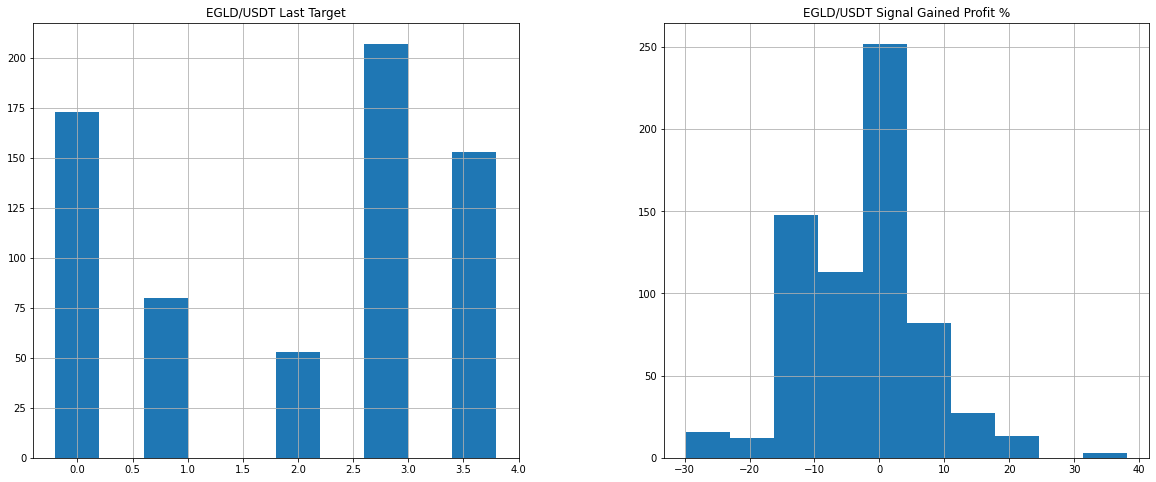

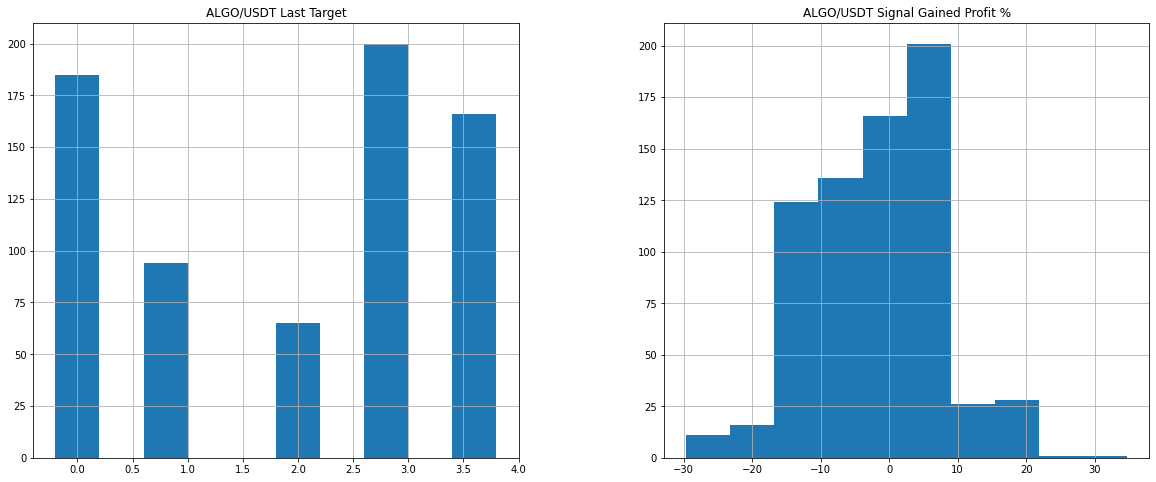

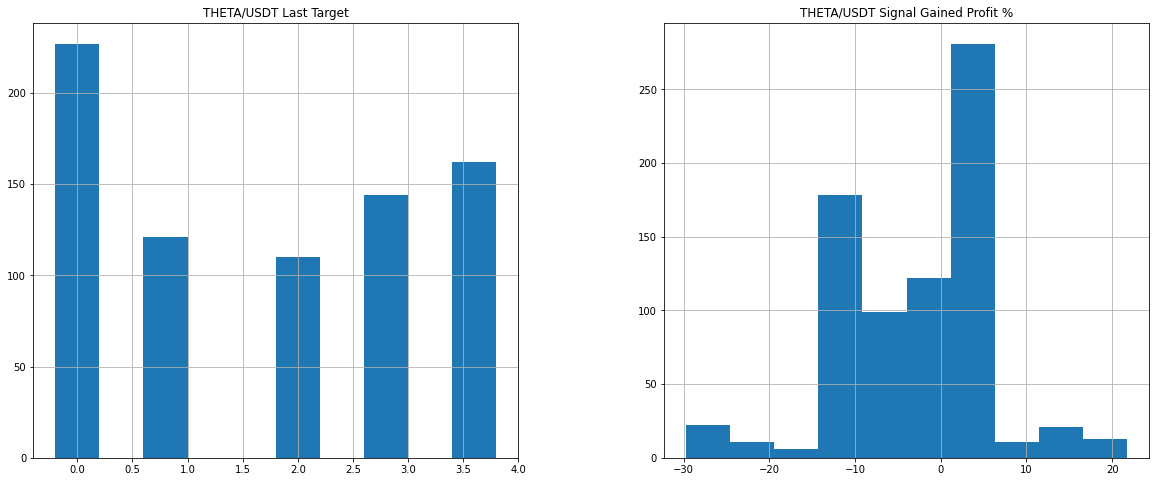

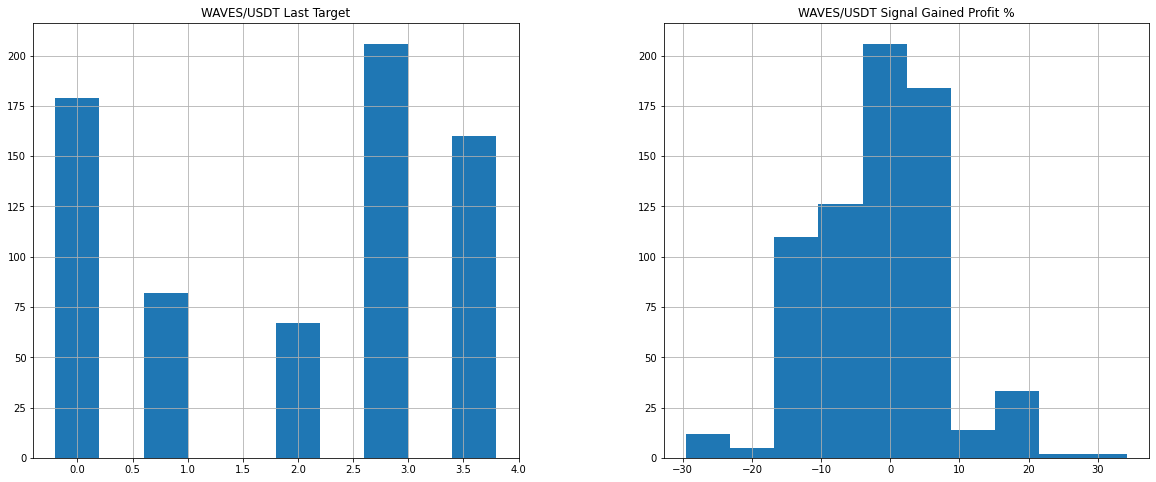

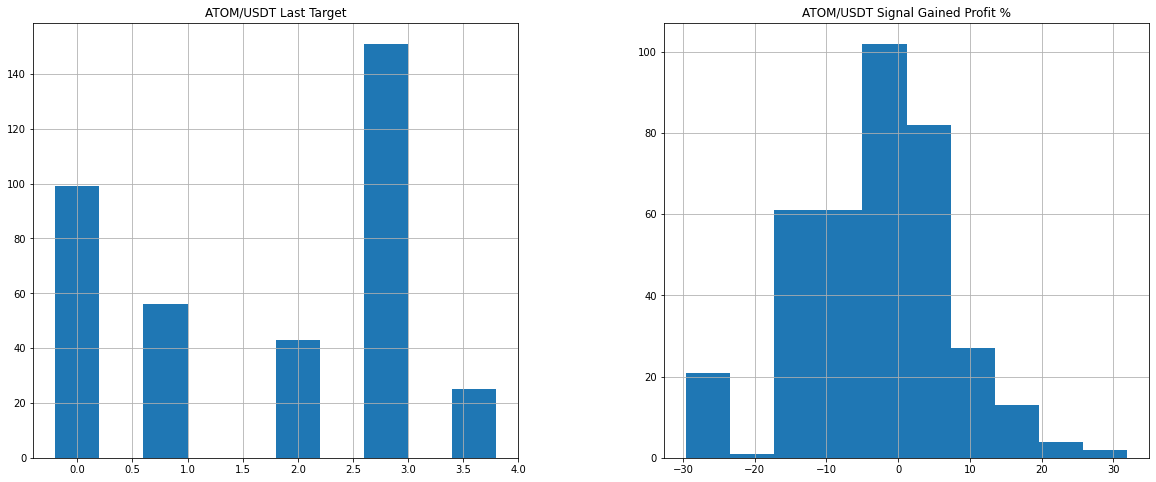

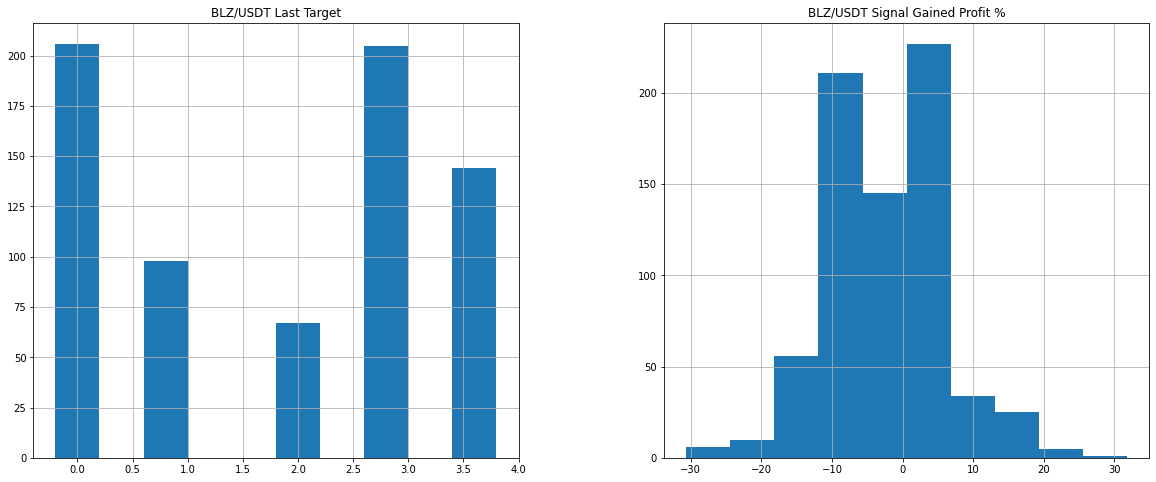

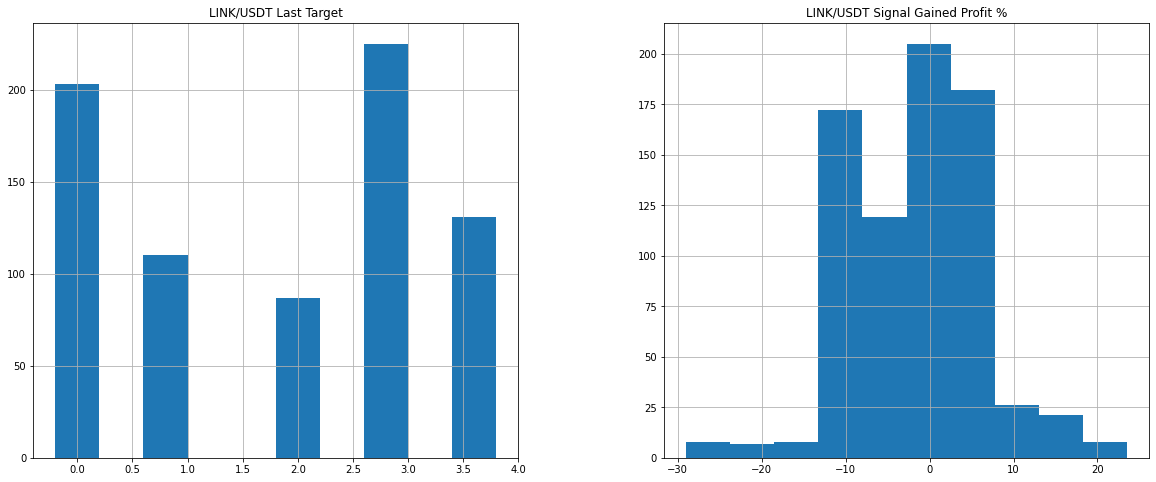

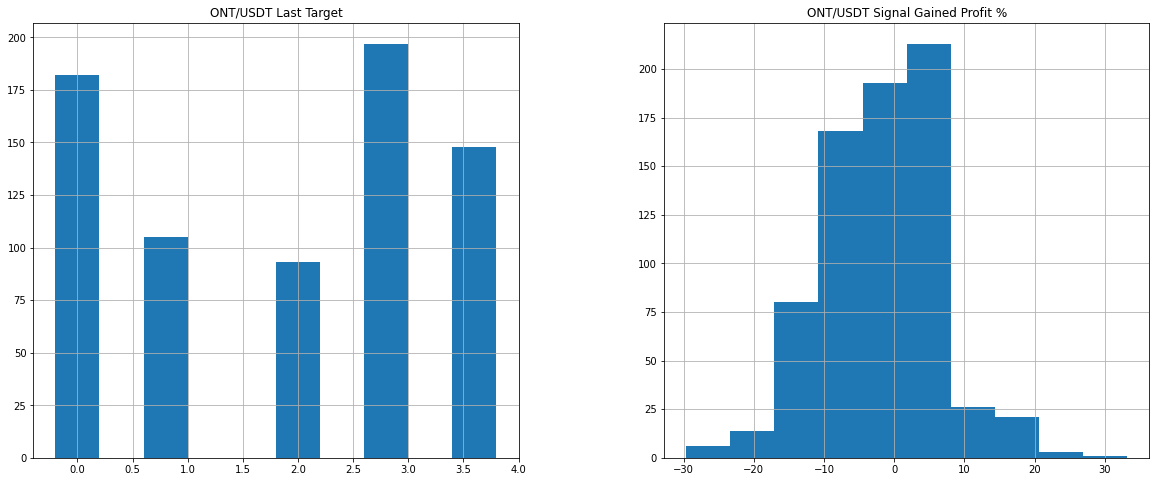

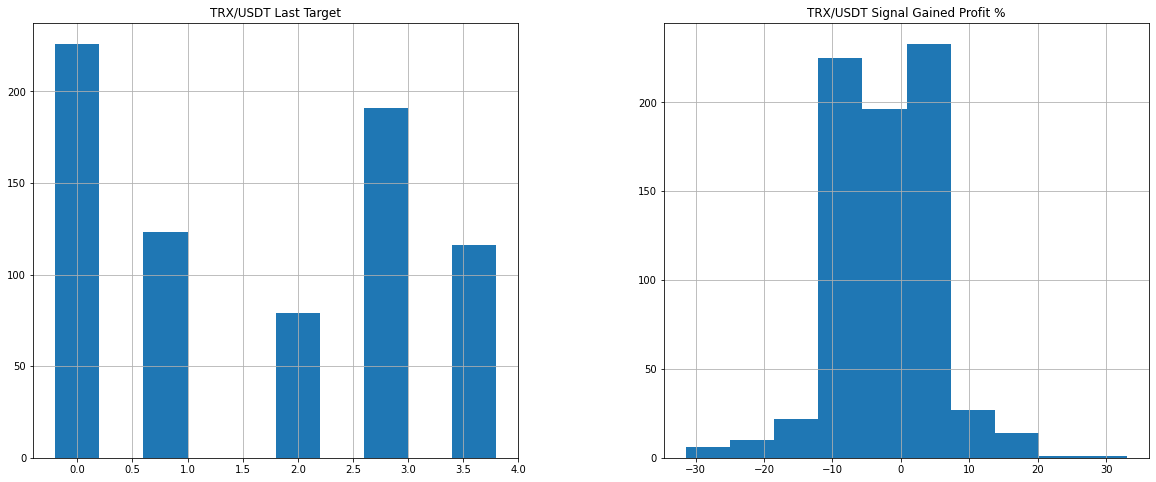

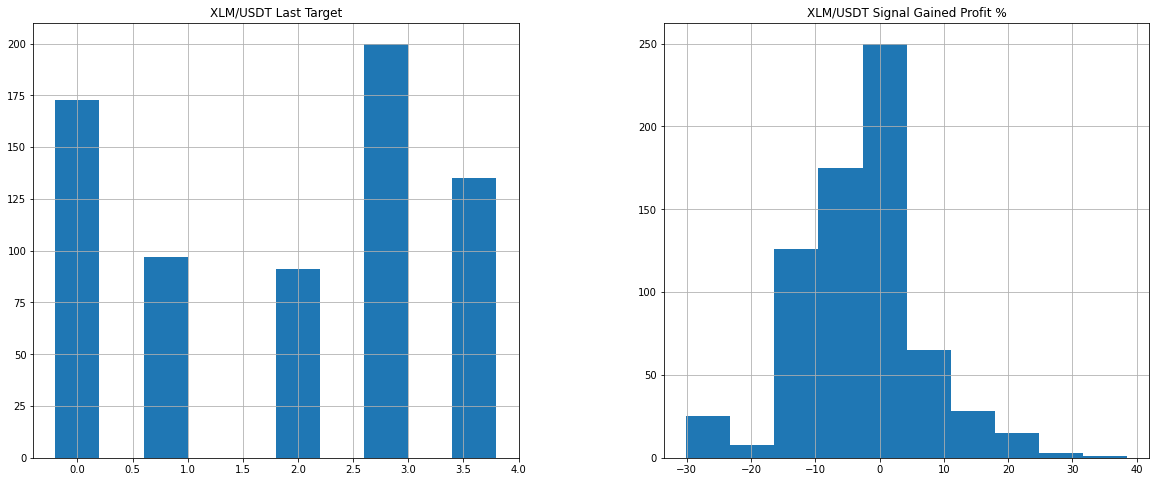

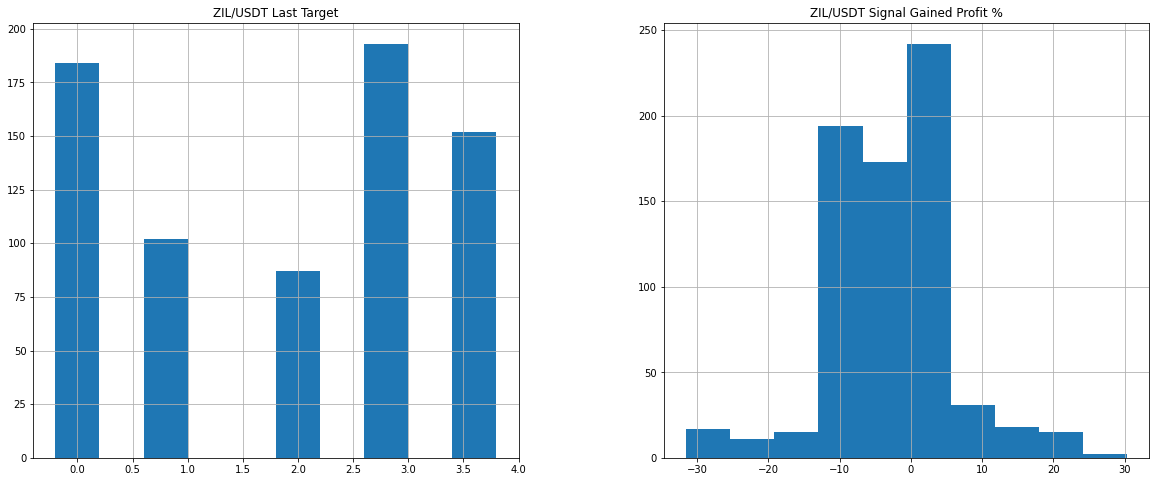

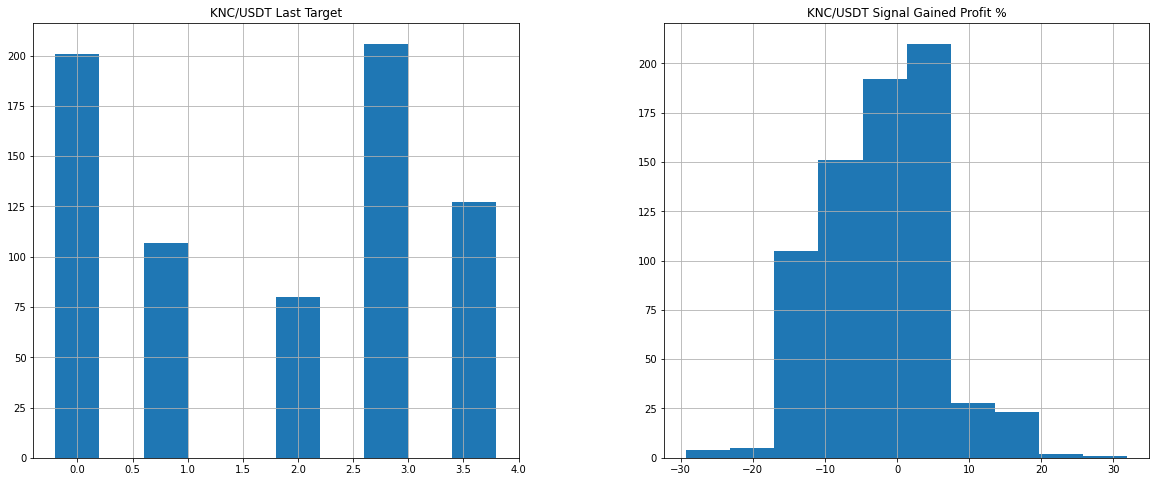

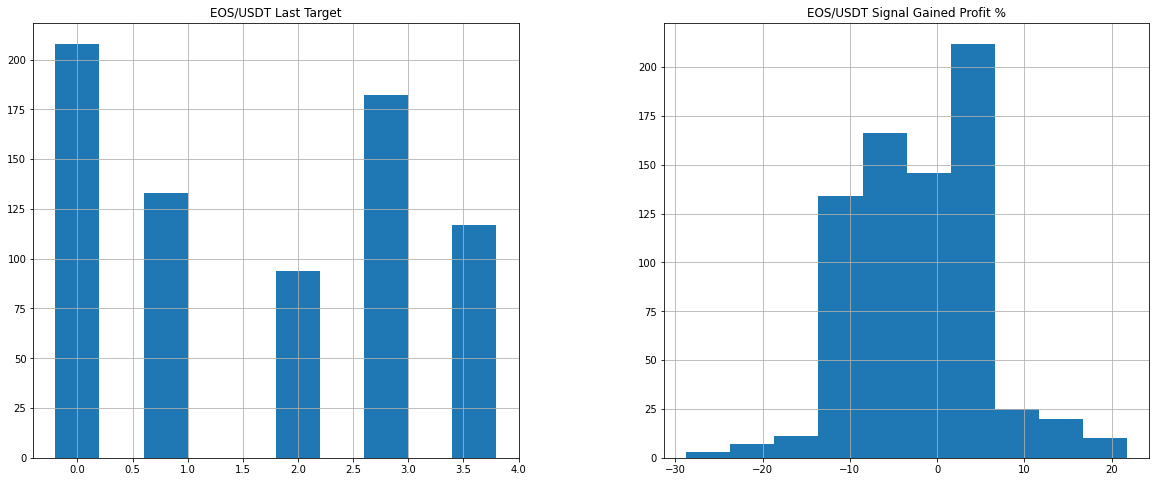

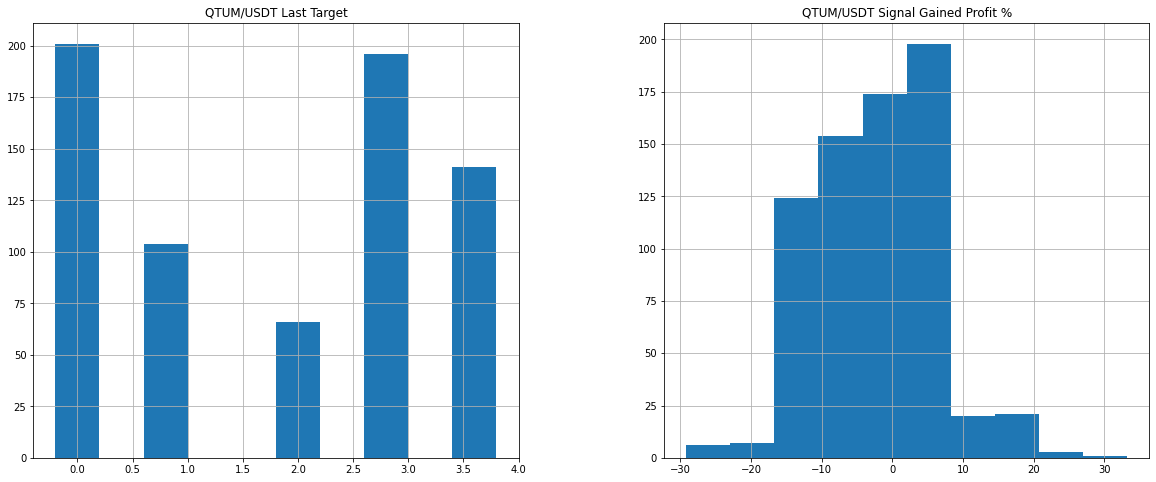

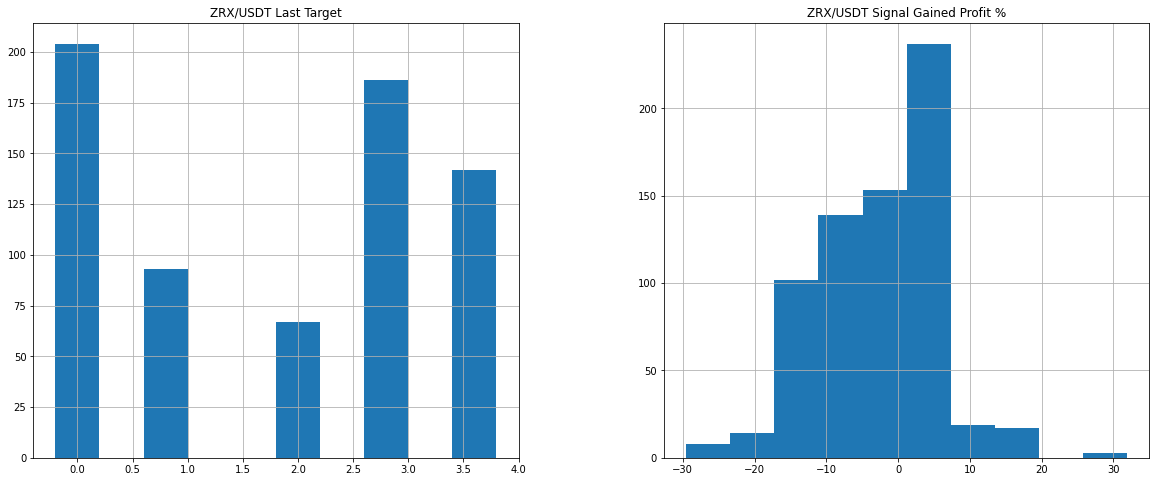

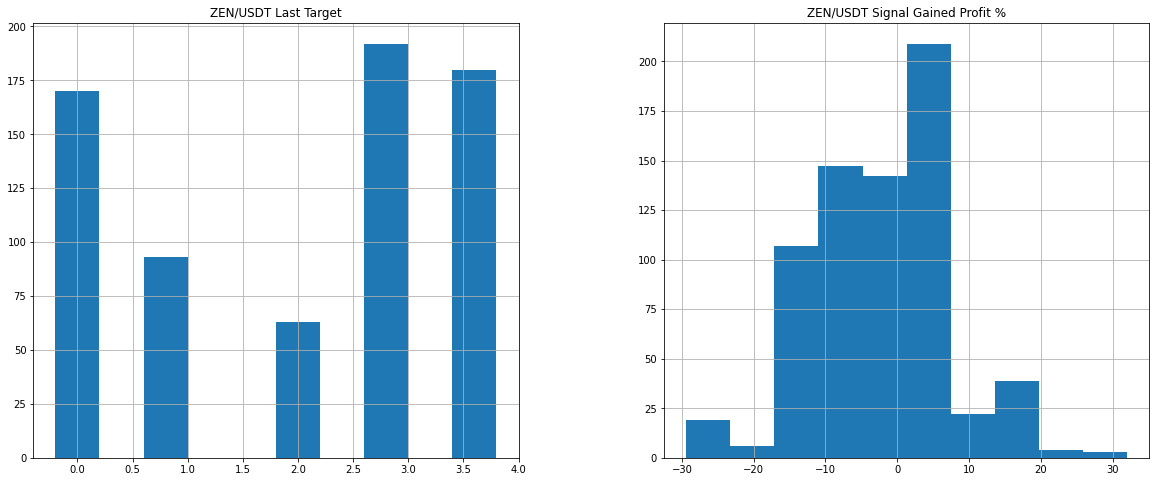

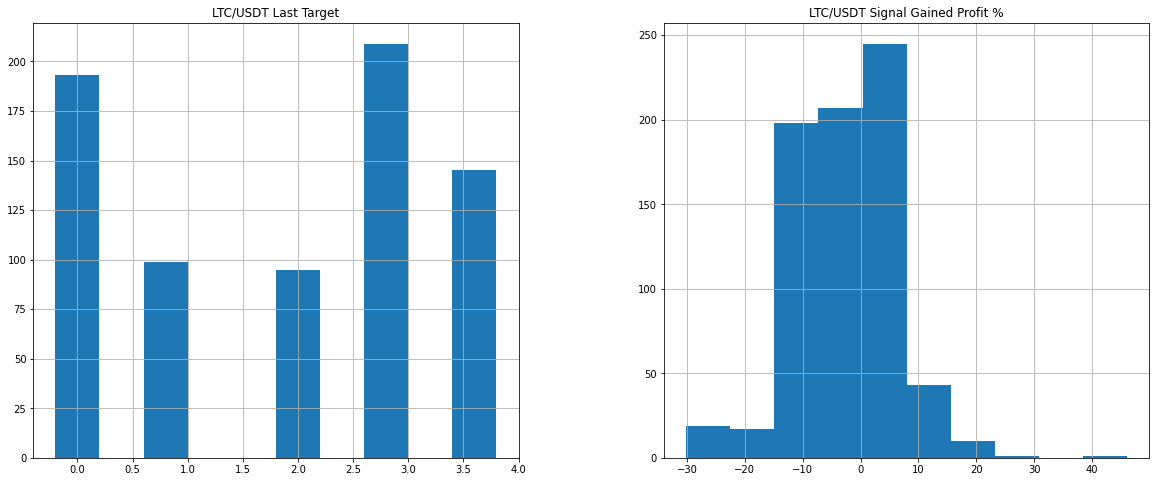

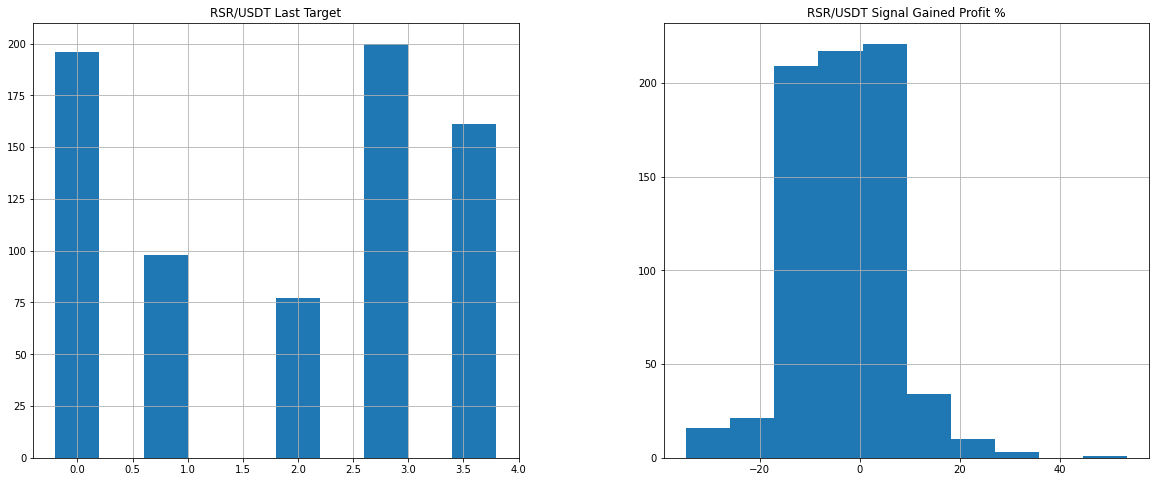

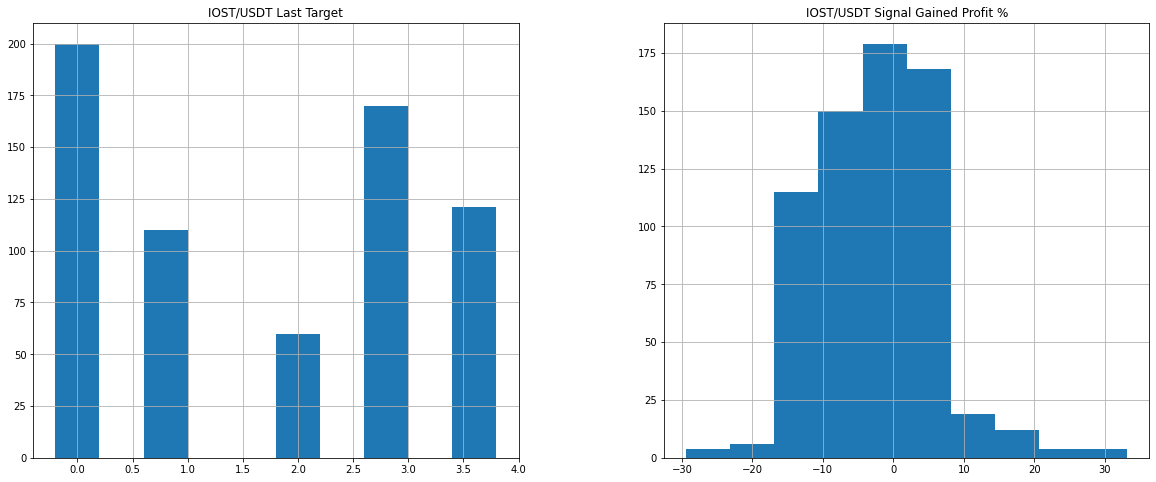

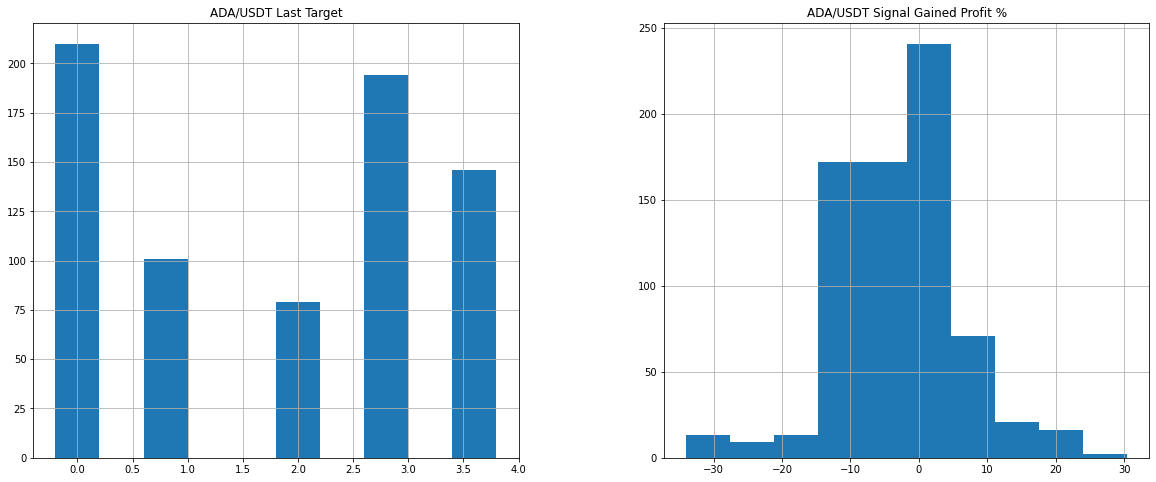

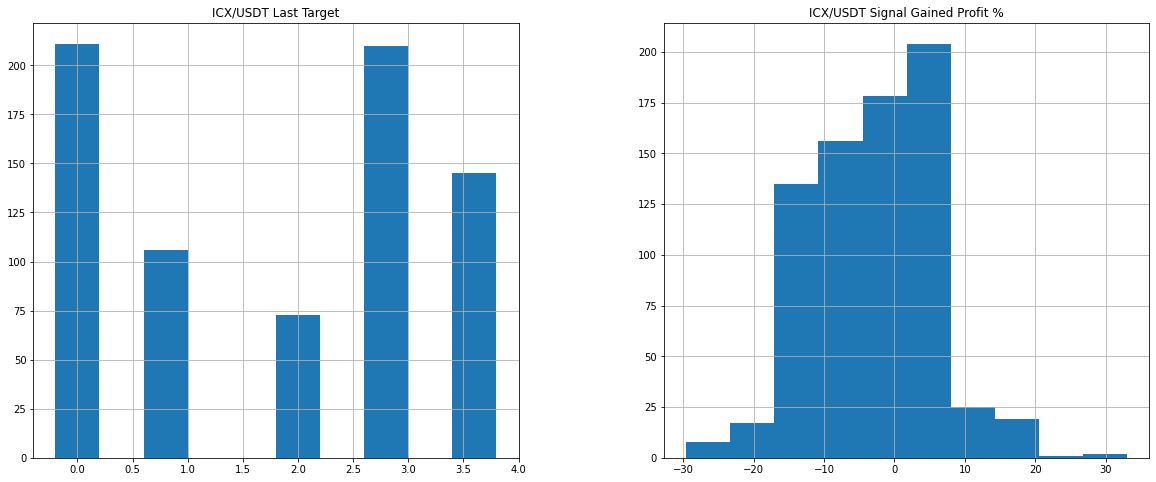

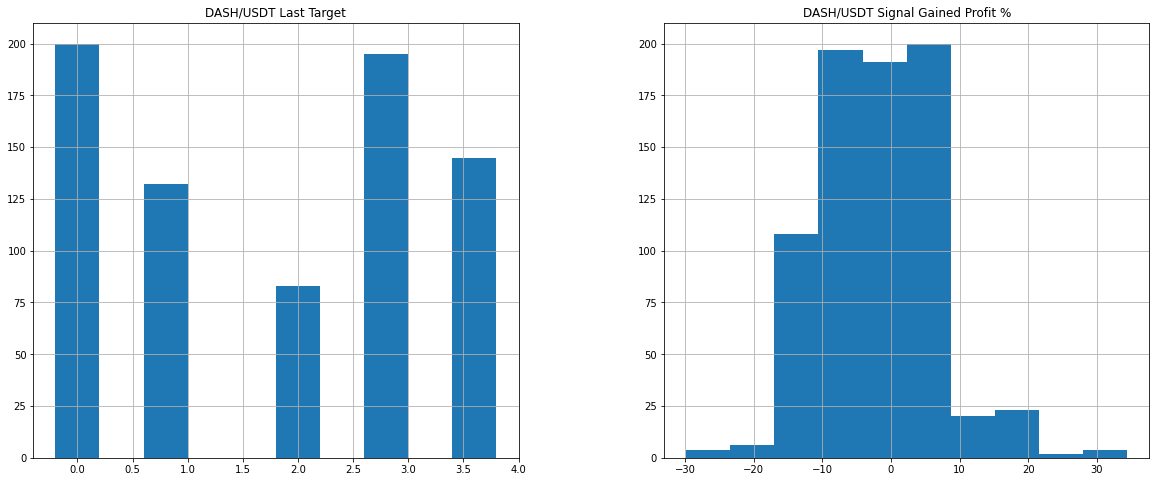

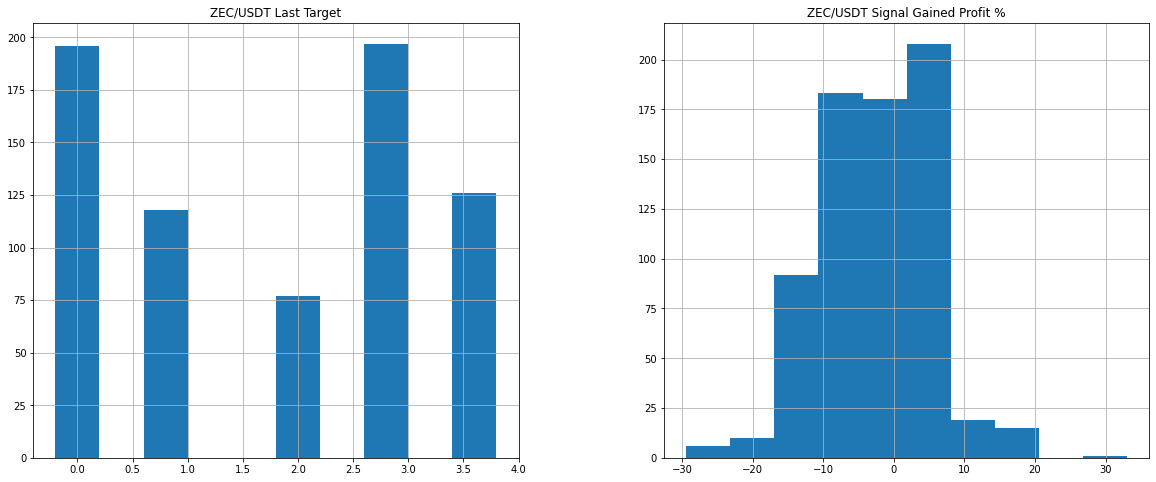

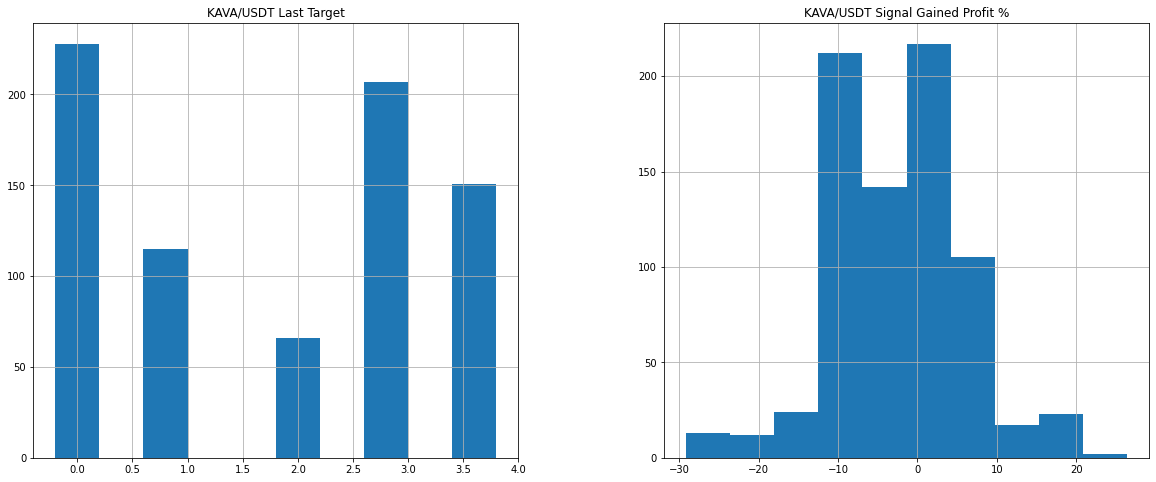

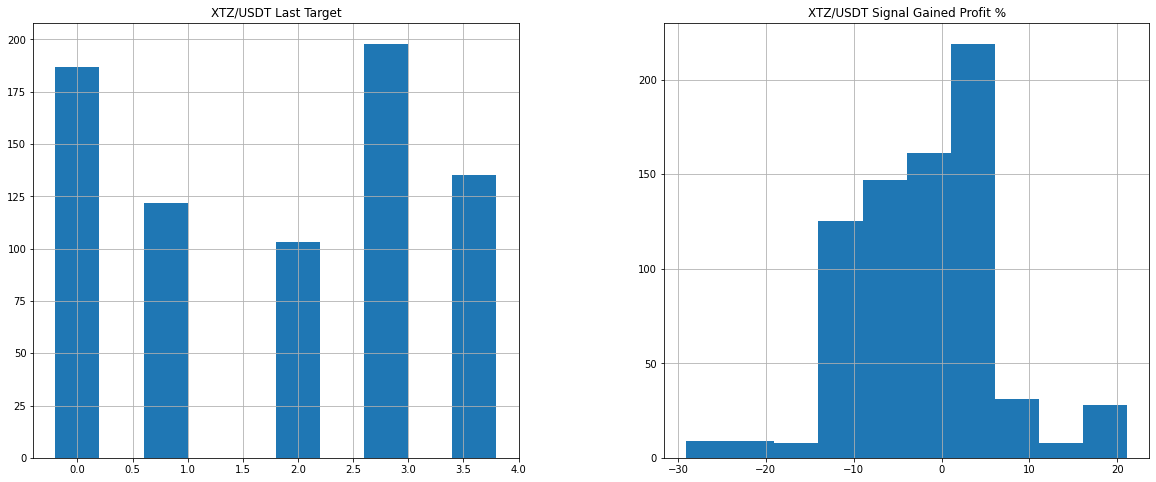

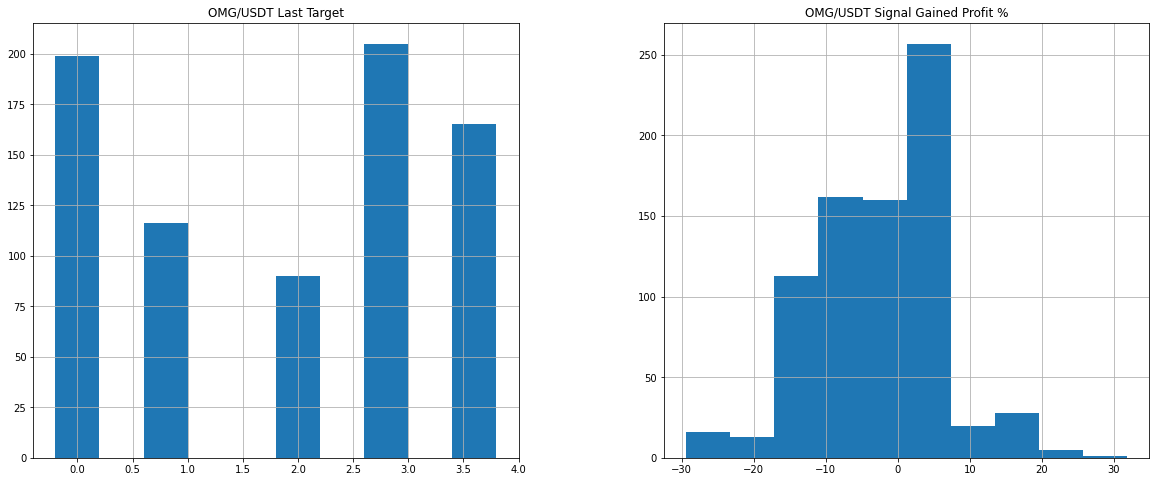

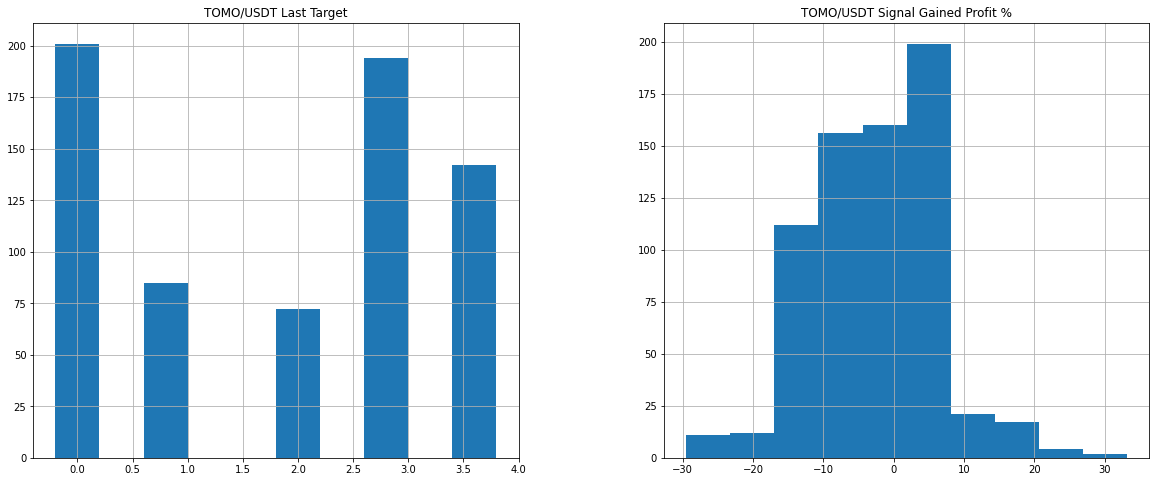

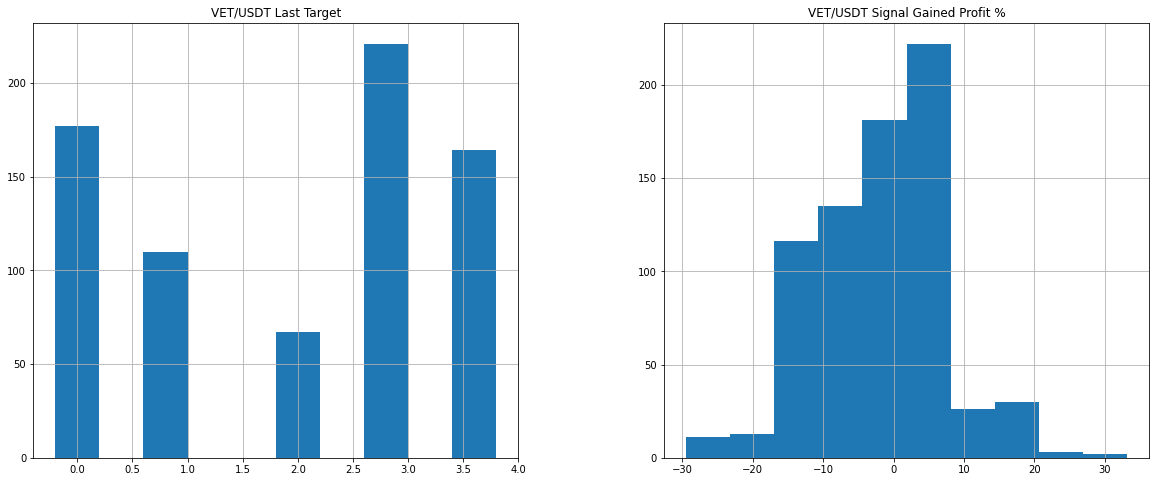

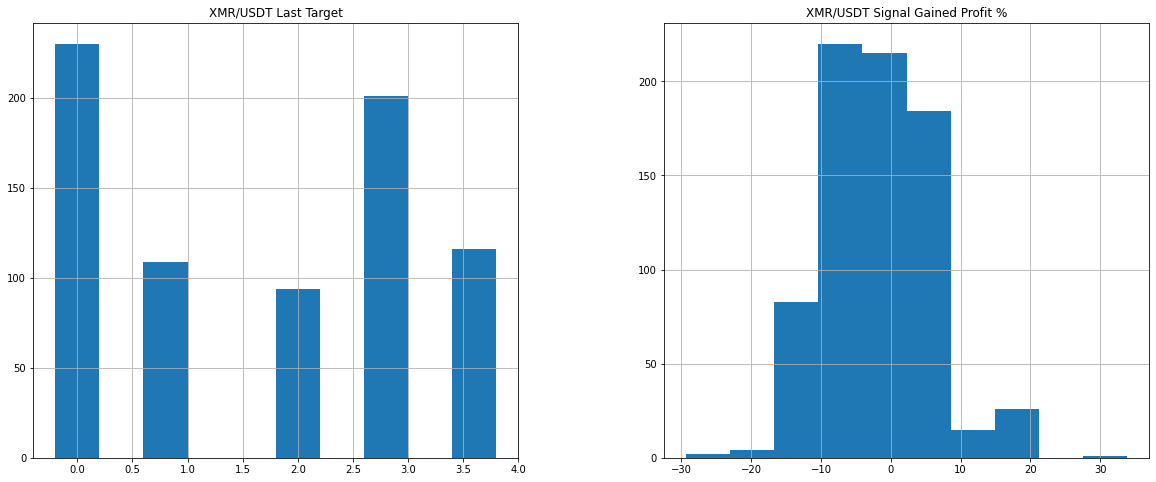

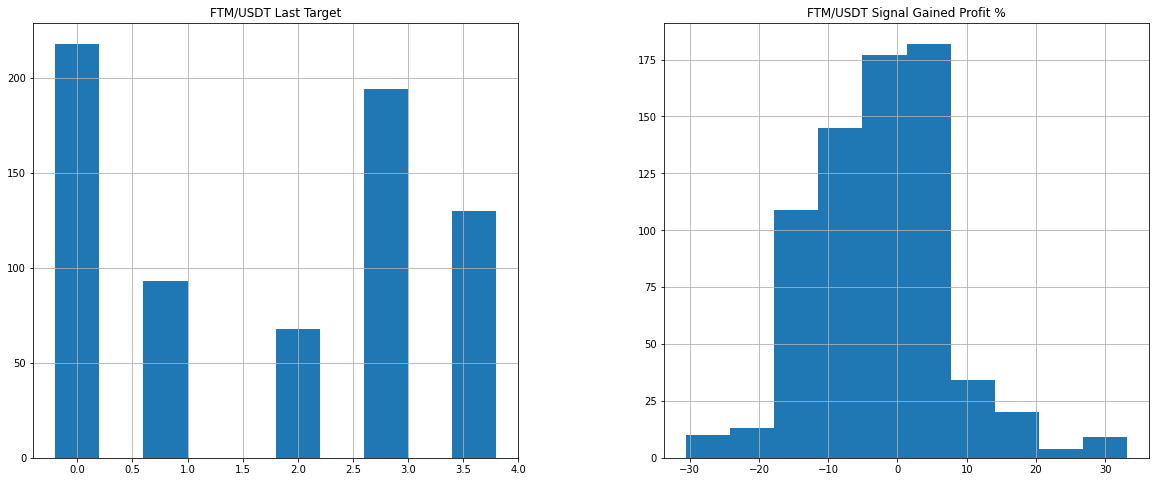

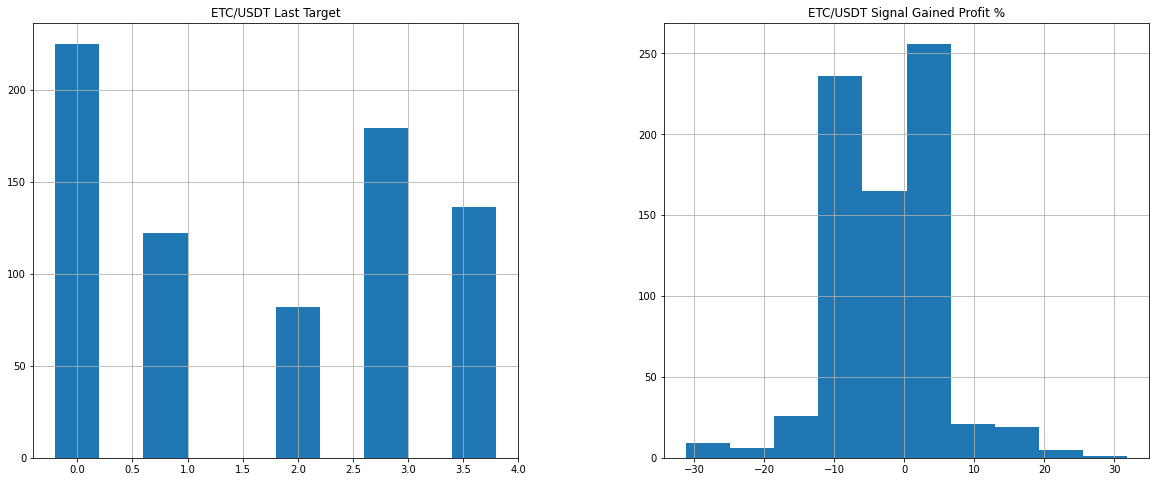

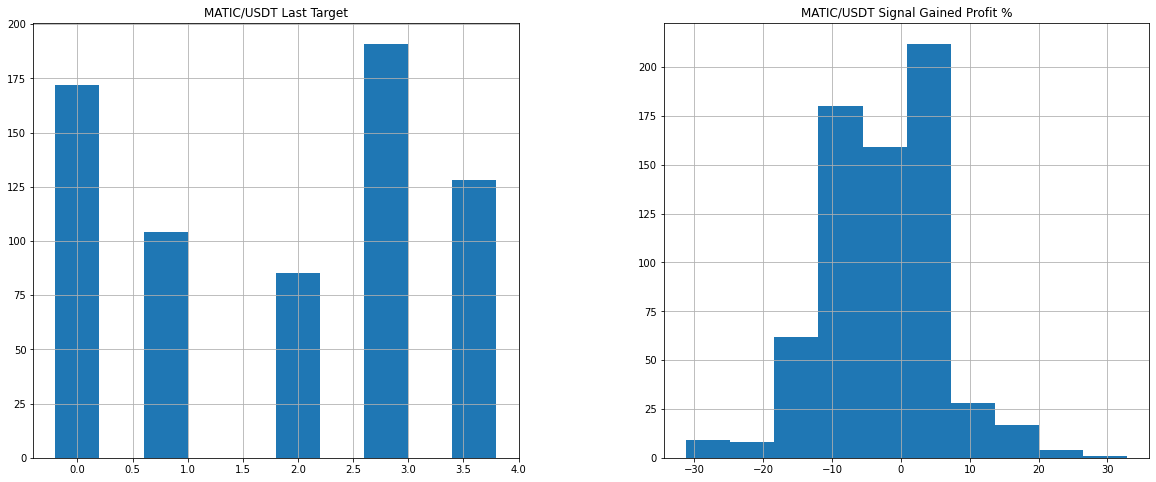

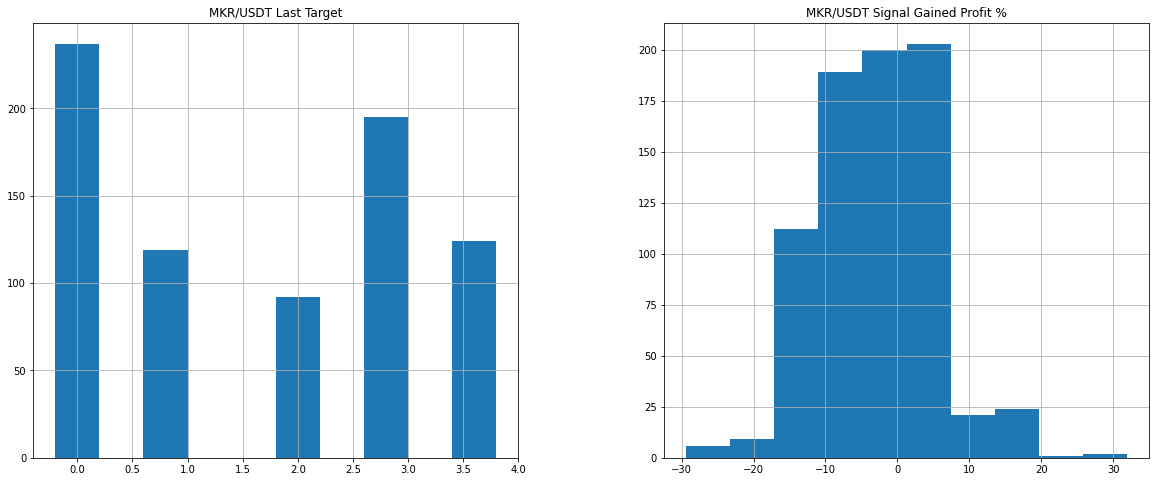

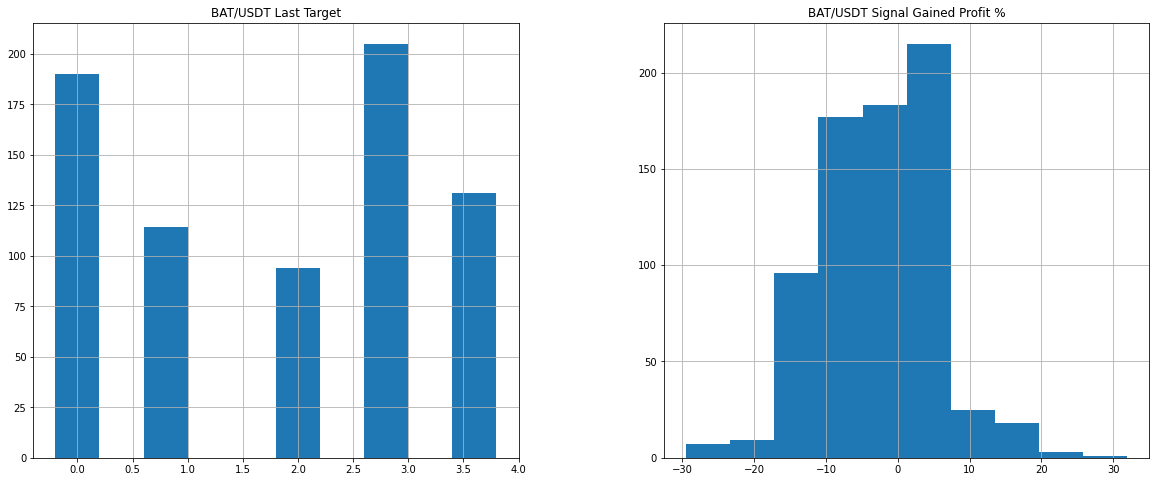

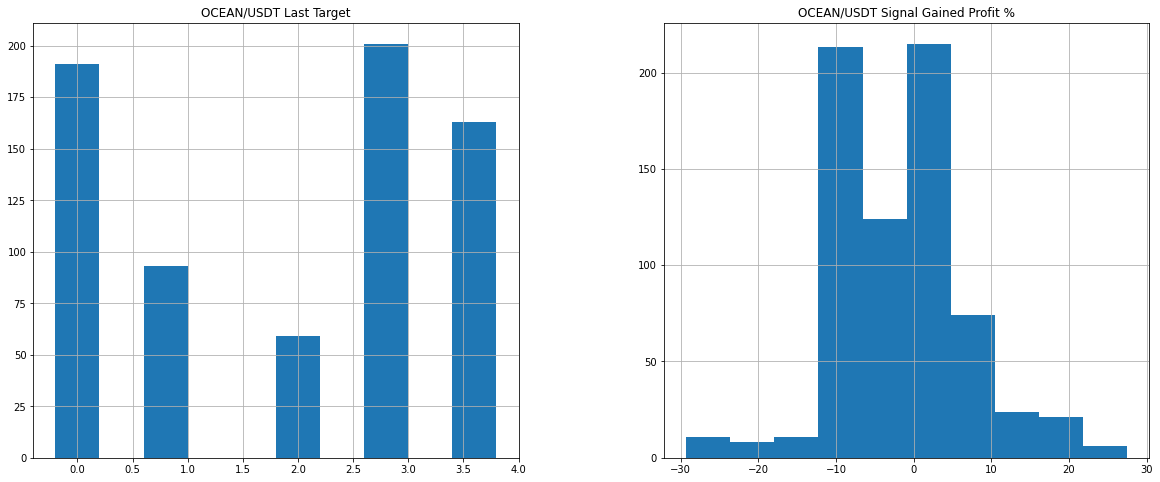

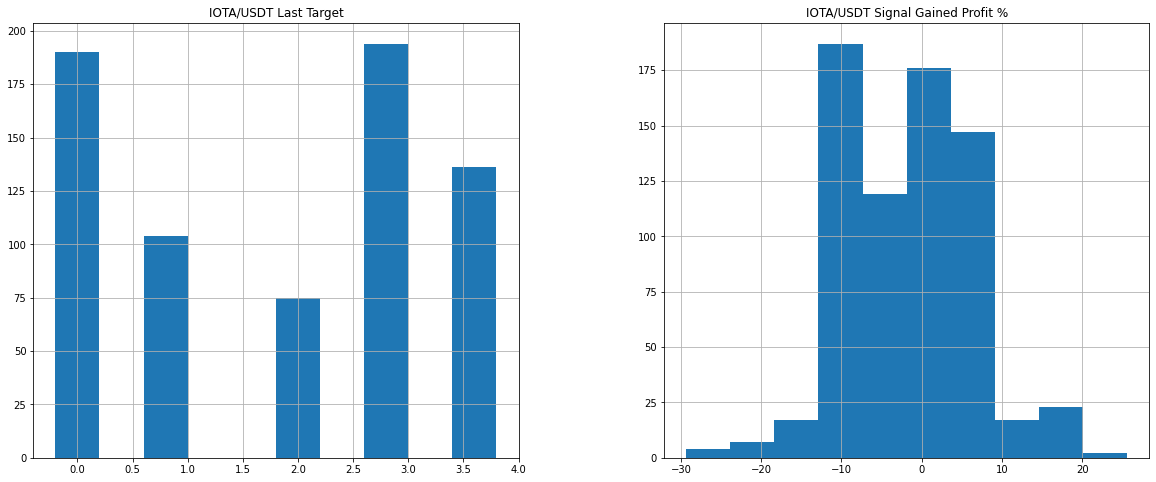

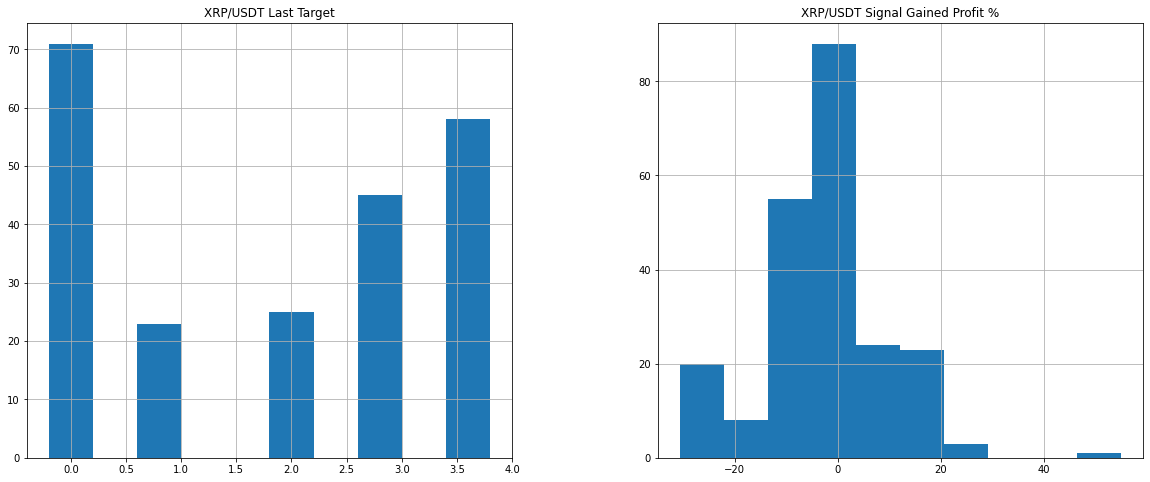

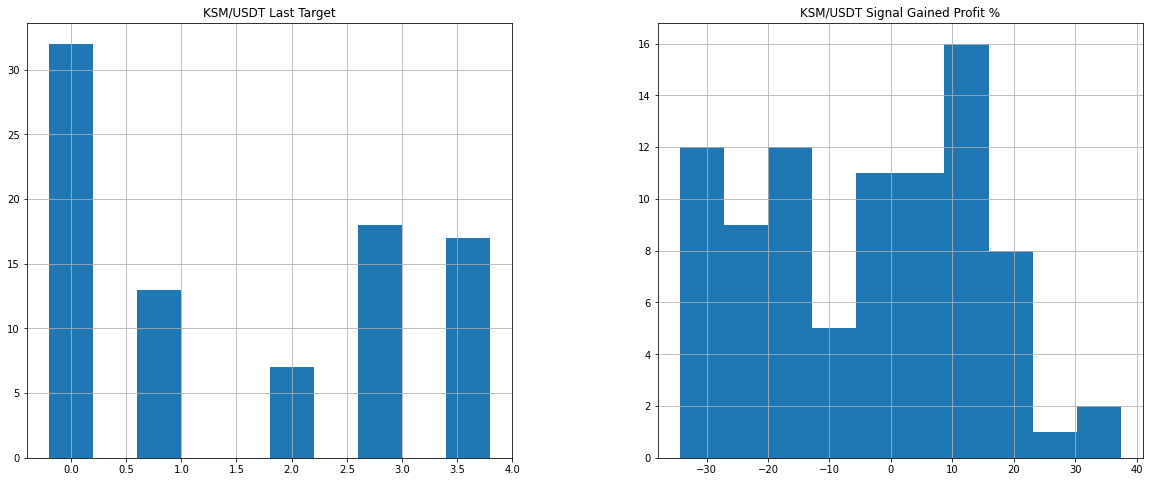

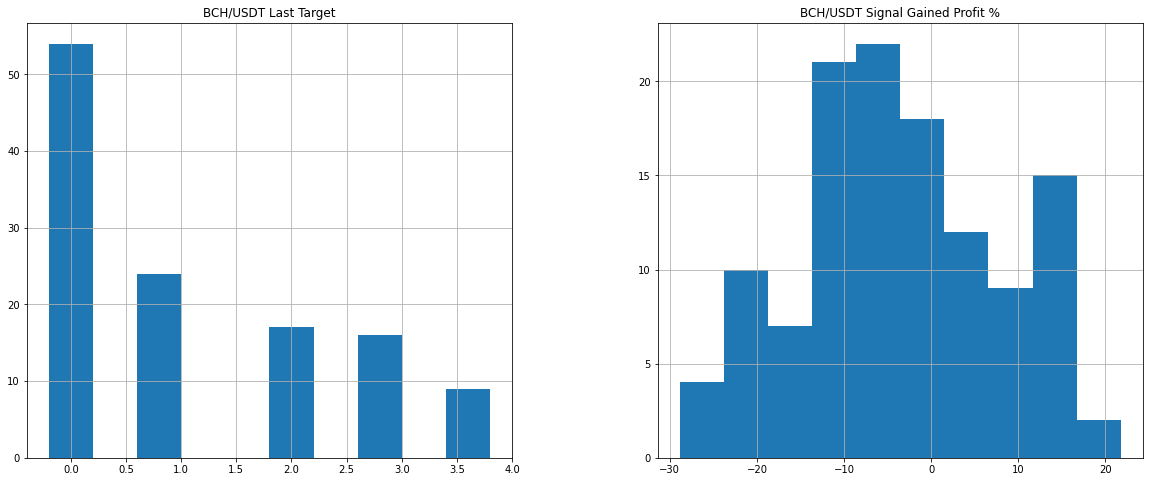

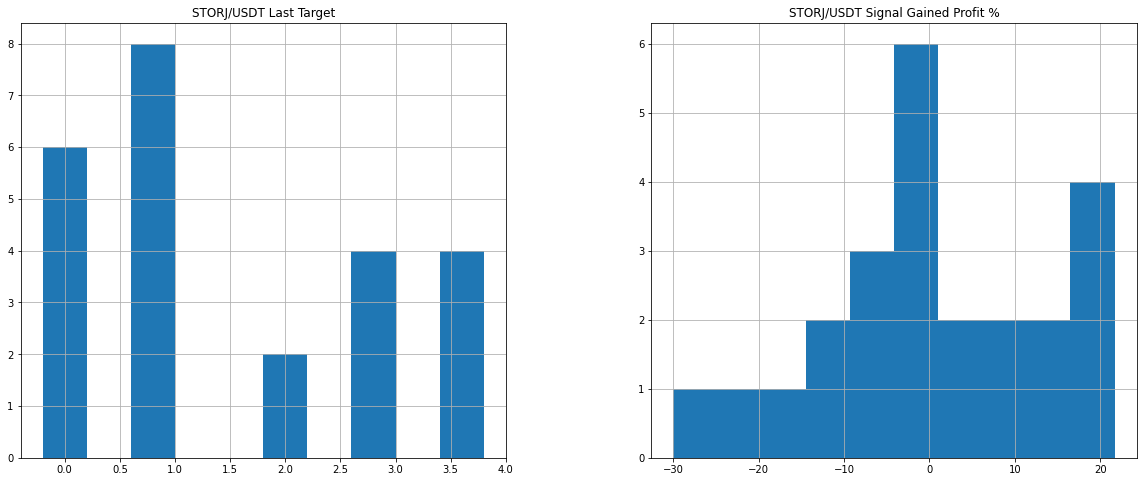

In [7]:
""" Plot out the coins, but having issues with the range of the axes"""
# helper function to loop through the list of coin dataframes and plot each graph as a subplot
%matplotlib inline

def coin_subplot(list_unique_coins=unique_coin_list, list_to_loop=list_of_coin_df):
    # enumerate returns the index of the element, and the element of the iterable it is iterating through 
    # note that All but the last (righthand-most) bin is half-open. See documentation for more details.
    # above is the reason that the last value on the right seems to stick to the second last value, i.e. 4 and 5 shud be separated but they are side by side for Last Target
    for index, element in enumerate(list_to_loop):
        coin_df = element
        ax = coin_df.hist(
            align="left", 
            figsize=(20, 8)
            )
        # print(ax) gives [[<AxesSubplot:title={'center':'Last Target'}> <AxesSubplot:title={'center':'Signal Gained Profit %'}>]]
        # print(type(ax)) gives <class 'numpy.ndarray'>
        # hence need to iterate through the np array, or select the sub element
        # need to brush up on np array stuff...
        ax[0][0].set_title("{0} Last Target".format(list_unique_coins[index]))
        ax[0][1].set_title("{0} Signal Gained Profit %".format(list_unique_coins[index]))
        
      

coin_subplot() 


array([[<AxesSubplot:title={'center':'Last Target'}>,
        <AxesSubplot:title={'center':'Signal Gained Profit %'}>]],
      dtype=object)

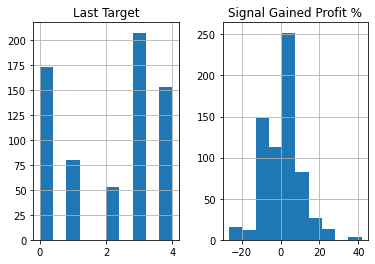

In [8]:
df_test = list_of_coin_df[0]
df_test.hist()
